# Financial Literacy Association's Stock Market Competitor Analysis

This is a dataset of all the competitors in UCI's Financial Literacy Association's (FLA) Stock Market Competition (SMC). First, we want to clean up the data and then analyze: 

1. trends in competitor demographics

2. success in reaching organization's goals

3. effectiveness in marketing strategies

**Information about the dataset:**

- Major: {Business, Biology, Undeclared, Social Studies, Computer Science, Engineering}

- Year: {1st, 2nd, 3rd, 4th, 5 (graduated)}

- Investing Knowledge: {1, 2, 3, 4, 5} (novice, beginner, intermediate, expert, master)

- Marketing Impression: {Instagram, Fairs (in-person boothing at club fairs), Discord, Friend (word of mouth), Merage School (promotions from business school), FLA (members from FLA), Flyers, Internet (self-sought)}

- Timestamp: {date:time (when they signed up)}

# Data Cleaning

In [1]:
# read csv file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

smc_data = pd.read_csv('/kaggle/input/smcdataclean/SMC Registration Form - Copy.csv')

In [2]:
# rename columns
smc_data = smc_data.rename(columns={'How Familiar Are You with the Stock Market and Investing?':'Investing Knowledge'})
smc_data = smc_data.rename(columns={'How did you hear about the competition?':'Marketing Impression'})

# drop NA values
smc_data = smc_data.dropna()

# drop duplicates
smc_data = smc_data.drop_duplicates()

# add columns for competition sign up year, month, day
smc_data['SignupYr'] = smc_data.Timestamp
smc_data['SignupMth'] = smc_data.Timestamp
smc_data['SignupDay'] = smc_data.Timestamp
smc_data['SignupYr'] = [int(i[0:4]) for i in smc_data['SignupYr']]
smc_data['SignupMth'] = [int(i[5:7]) for i in smc_data['SignupMth']]
smc_data['SignupDay'] = [int(i[8:11]) for i in smc_data['SignupDay']]

smc_data

,Timestamp,Email,Major,Year,Investing Knowledge,Marketing Impression,SignupYr,SignupMth,SignupDay
0,2022/09/26 6:34:02 PM MDT,Dylan10@uci.edu,Business,2,2,Flyer,2022,9,26
1,2022/09/26 6:55:11 PM MDT,keviny15@uci.edu,Business,1,4,Fairs,2022,9,26
2,2022/09/27 1:08:05 AM MDT,toann4@uci.edu,Engineering,2,2,FLA,2022,9,27
3,2022/09/27 2:39:06 PM MDT,Sdeng5@uci.edu,Undeclared,1,2,Instagram,2022,9,27
4,2022/09/27 2:40:43 PM MDT,isabelmn@uci.edu,Undeclared,1,2,Fairs,2022,9,27
...,...,...,...,...,...,...,...,...,...
88,2022/12/08 1:34:16 PM MST,khangnd1@uci.edu,Biology,3,1,Merage School,2022,12,8
89,2023/01/03 5:08:32 PM MST,jiajung2@uci.edu,Business,4,5,Internet,2023,1,3
90,2023/01/18 10:29:45 AM MST,zhenqih1@uci.edu,Business,3,5,Instagram,2023,1,18
91,2023/01/23 1:20:48 PM MST,Sushang1@uci.edu,CS,2,2,FLA,2023,1,23


# Data Analysis

Goals:
1. **Breakdown competitor demographics**
2. **Measure organization's goals**

    a. Target diverse pool of majors
    
    b. Target diverse pool of student years
    
    c. Target students new to investing
3. **Measure success of marketing strategies**

In [3]:
# dataset overview
smc_data.describe(include="all")

,Timestamp,Email,Major,Year,Investing Knowledge,Marketing Impression,SignupYr,SignupMth,SignupDay
count,93,93,93,93.000000,93.000000,93,93.000000,93.000000,93.000000
unique,93,93,6,NaN,NaN,8,NaN,NaN,NaN
top,2022/09/26 6:34:02 PM MDT,Dylan10@uci.edu,Business,NaN,NaN,Instagram,NaN,NaN,NaN
freq,1,1,57,NaN,NaN,31,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.483871,2.290323,NaN,2022.043011,9.559140,14.580645
std,NaN,NaN,NaN,1.028009,1.212083,NaN,0.203981,1.814569,9.342891
min,NaN,NaN,NaN,1.000000,1.000000,NaN,2022.000000,1.000000,2.000000
25%,NaN,NaN,NaN,2.000000,1.000000,NaN,2022.000000,10.000000,4.000000
50%,NaN,NaN,NaN,3.000000,2.000000,NaN,2022.000000,10.000000,17.000000
75%,NaN,NaN,NaN,3.000000,3.000000,NaN,2022.000000,10.000000,23.000000


**Students' Years in Stock Market Competition (SMC)**

We want to look into any trends in the academic years of our competitors. One questions to ask is: 
1. Did we have a even composition of our target students (Year 1-4)?

Median 3.0


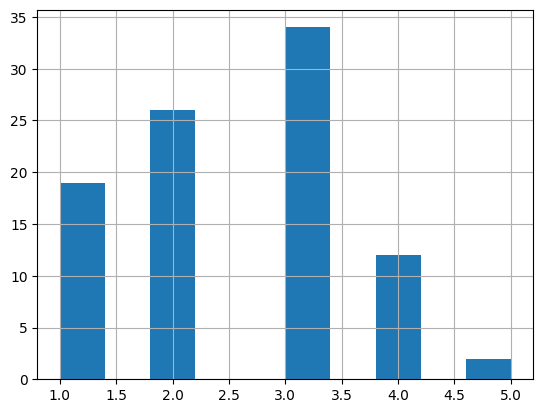

In [4]:
# breakdown of competitors' years
smc_data.Year.hist()
median = smc_data.Year.median()
mean = smc_data.Year.mean()
print("Median", median)

The distribution of competitors' years is slightly right skewed with a median of 3 (3rd year). The highest category is 3rd years, which can either be continuing students or transfer students.

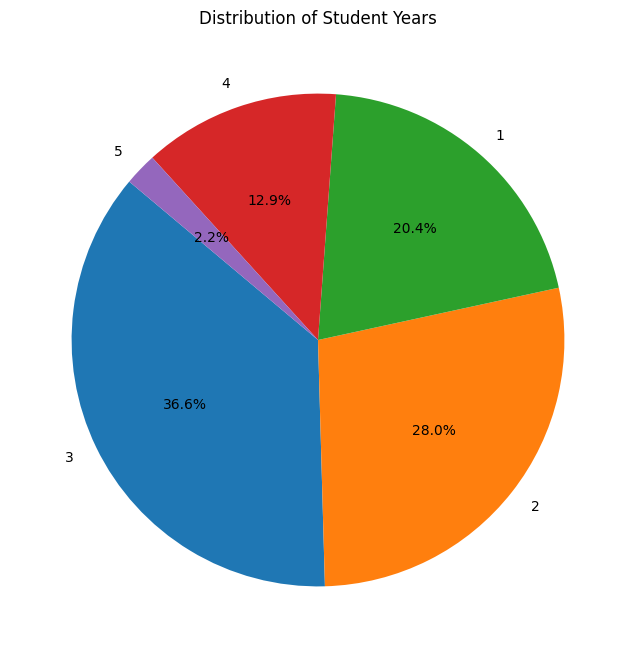

In [5]:
yr_counts = smc_data.Year.value_counts()

plt.figure(figsize=(8, 8))
plt.title('Distribution of Student Years')
plt.pie(yr_counts, labels=yr_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

Overall, 2nd and 3rd years make up nearly 2/3 of competitors. The composition of the competitors' years leads with 3rd years being 36.6% of competitors and 2nd years being 28%. As part of our goals, our organization wanted to have a diverse competitor pool, which we have accomplished with no category taking more than 50% of our competitor pool. However, our organization should strive to grow the number of 1st year participants to build long-lasting member retention starting at freshman year and grow number of 4th year participants to have an even composition of student years.

**Student's Investing Knowledge in Stock Market Competition (SMC)**

We want to look into any trends in the investing knowledge of our competitors. Questions to ask are:

1. Do we have a even composition of our investing knowledge students?
2. Did we reach students newer to investing?

Median 2.0
Mean 2.2903225806451615


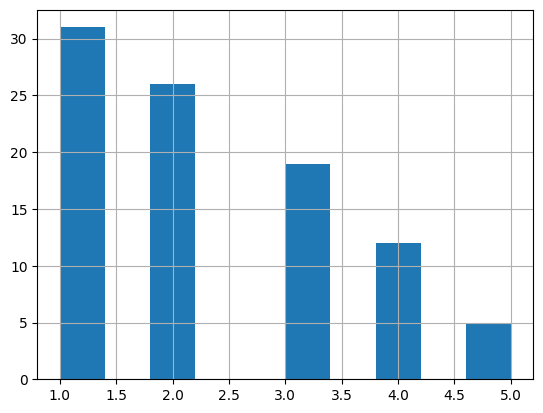

In [6]:
# breakdown of competitors' investing knowledge
smc_data["Investing Knowledge"].hist()
median = smc_data["Investing Knowledge"].median()
mean = smc_data["Investing Knowledge"].mean()
print("Median", median)
print("Mean", mean)

The distribution of competitors' investing knowledge is right skewed with a median of 2 (beginner). The highest category is 1 (novice) descending in frequency as investing knowledge increases. 

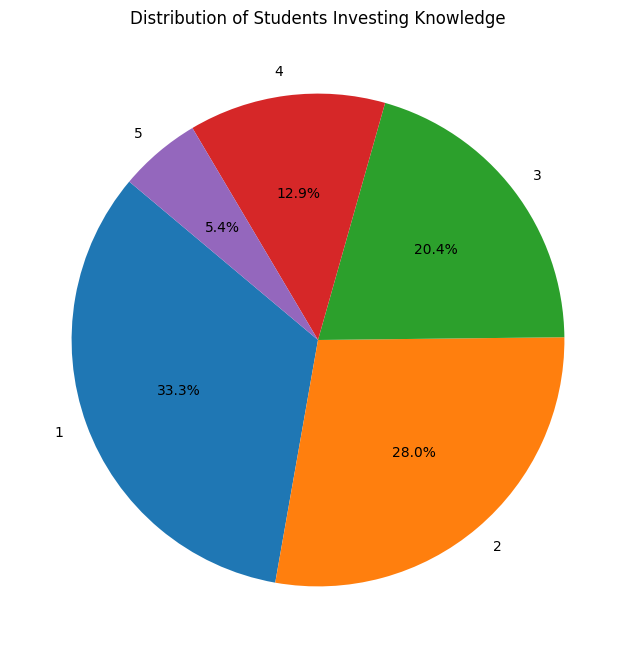

In [7]:
know_counts = smc_data["Investing Knowledge"].value_counts()

plt.figure(figsize=(8, 8))
plt.title('Distribution of Students Investing Knowledge')
plt.pie(know_counts, labels=know_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

61% of competitors had an investing knowledge level of 1 and 2 (novice-beginner). So, our goal of reaching students with less investing  familiarity is acheived with more than half of participants being newer traders. Additionally, the distribution is not evenly divided with novice-intermediate investors being 81.4%, a significant majority of the dataset. If the dataset was equally divided, novice-intermediate investors would be 60% of the distribution.

**Competitors' Majors in Stock Market Competition (SMC)**

We want to look into any trends in the majors of our competitors. Questions to ask are:

1. Do we have a even composition of majors in the SMC?

<Axes: >

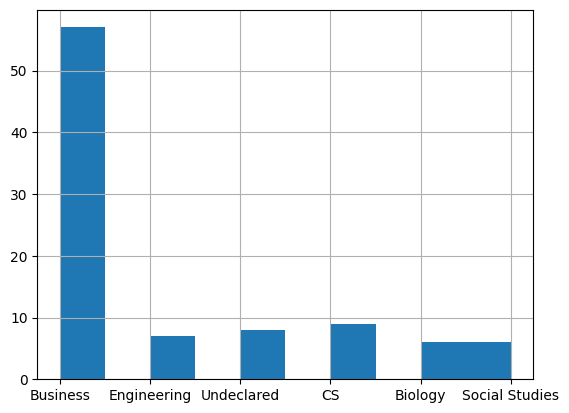

In [8]:
# breakdown of competitors' majors
smc_data.Major.hist()

Business related majors make up highest category of SMC competitor distribution being 61%

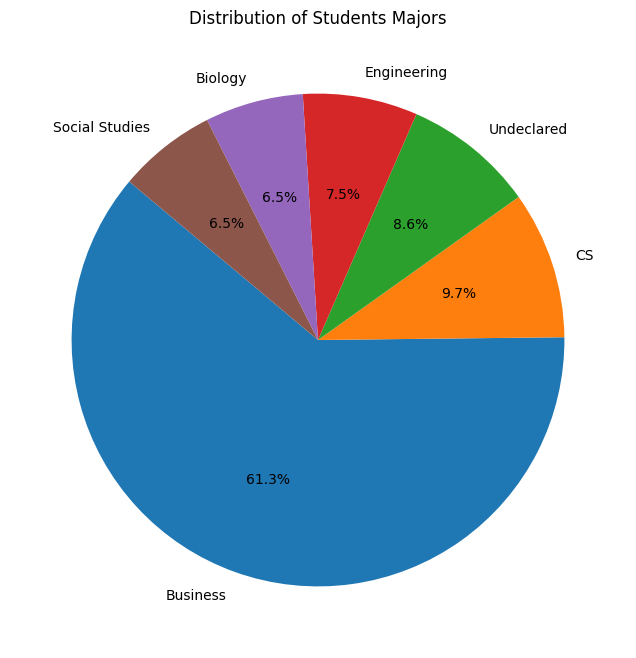

In [9]:
major_counts = smc_data["Major"].value_counts()

plt.figure(figsize=(8, 8))
plt.title('Distribution of Students Majors')
plt.pie(major_counts, labels=major_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

Nearly 3/5 of competitors are Business related major, while the remaining 2/5 divide nearly equally into Computer Science, Undeclared, Engineering, Biology, and Social Studies majors. Overall, SMC competitors are mostly business majors, so our organization's goal of having a diverse amount of majors requires further effort and FLA should focus on diversifying major composition of SMC competitors.

**Marketing Impressions on SMC Competitors**

We want to look into any trends in the marketing impressions of our competitors. Questions to ask are:

1. What marketing platforms were the most successful? least successful?

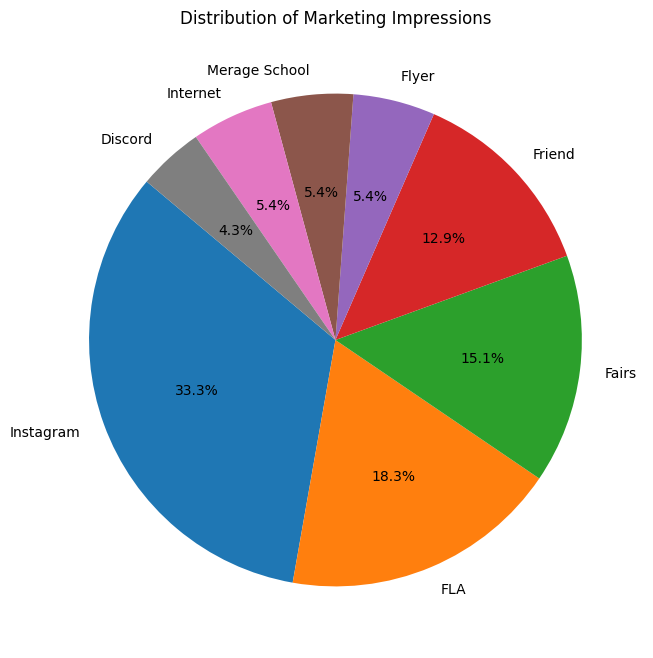

In [10]:
mkt_counts = smc_data["Marketing Impression"].value_counts()

plt.figure(figsize=(8, 8))
plt.title('Distribution of Marketing Impressions')
plt.pie(mkt_counts, labels=mkt_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

Majority of Marketing Impressions is through Instagram which is 1/3 of Outreach. Following Instagram is conversion from FLA members at (18%), then In-Person Boothing at Anteater Involvement Fair (AIF) & Merage Undergraduate Student Association (MUSA) Fair (15%), and lastly Word of Mouth/Friends at 13%.

These results highlight our marketing campaign being successful in building a strong Instagram presence (Instagram), promoting the competiton to FLA members (FLA), and impactful boothing (Fairs). Other marketing platforms like Discord (4.3%), Flyer (5.4%), Facebook (0%) had low impact on attaining SMC competitors. It is recommended to prioritze Instagram, boothing, and promoting FLA in future marketing efforts.

**SMC Competitor Signup Month Analysis**

We want to look into any trends in the signups of our competitors. Questions to ask are:

1. The SMC is open for signups from Sept-March. Is there a even distribution of signups over the competition timeline?
2. If there are any spikes in signups, what marketing platforms drove the spikes in those months?

Median 10.0


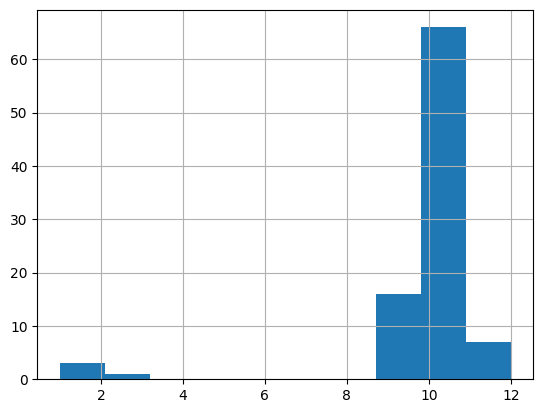

In [11]:
smc_data.SignupMth.hist()
print("Median", smc_data.SignupMth.median())

Majority of signups are in October, which is the start of the competition, and the distribution is not uniform.

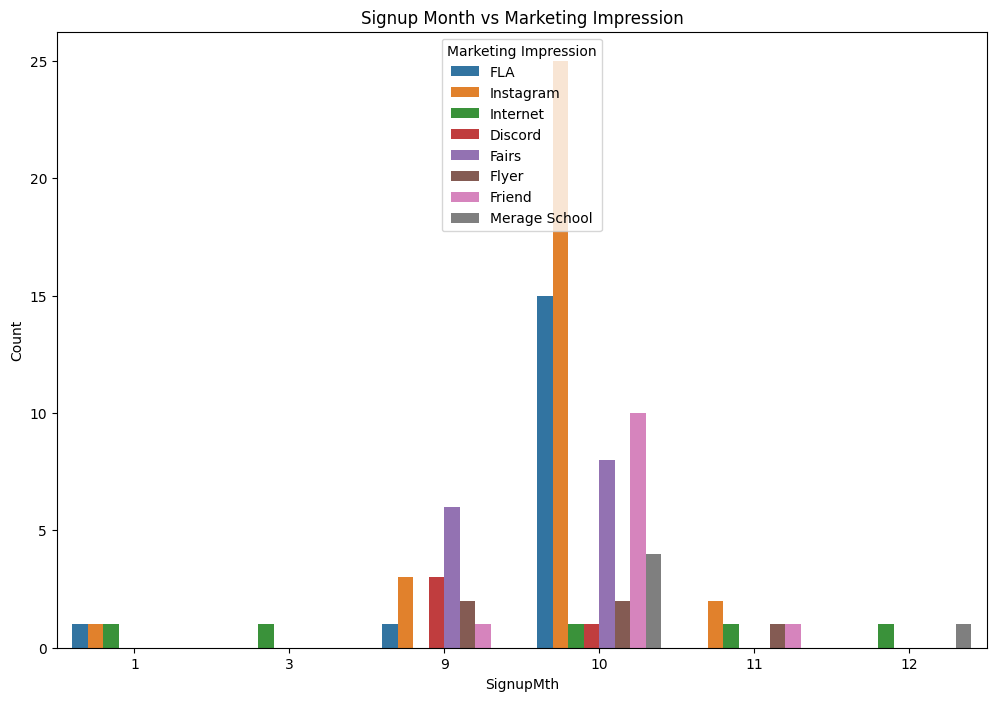

In [12]:
# breaking down marketing impressions by month
m_m = smc_data.groupby(by=["SignupMth", "Marketing Impression"]).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(x='SignupMth', y='Count', hue="Marketing Impression", data=m_m)
plt.title('Signup Month vs Marketing Impression')
plt.xlabel('SignupMth')
plt.ylabel('Count')
plt.legend(title='Marketing Impression')
plt.show()

Majority of signups for the competition are during Sept. (9) and Oct. (10). September (9) marks Anteater Involvement Fair (AIF), club rush for incoming students, thus higher impressions from Fairs. October (10) marks start of our Instagram campaign, FLA meetings, MUSA Involvement Fair (club rush for incoming business students), thus higher impressions from Instagram, FLA, and Fairs. Additionally, during Sept. and Oct. we have the highest signups, thus higher impressions from friends, where organic efforts like social media, boothing, etc lead to an increase in inorganic marketing (friends).

**Correlations between Demographics**

**Major vs Investing Knowledge**

We want to look into any correlation between major and investing knowledge in our competitors. Questions to ask are:
1. Are business majors more likely to have higher investing knowledge?
2. Do non-business majors have less investing knowledge?
3. Which majors have a diverse spread of investors from novice to master?


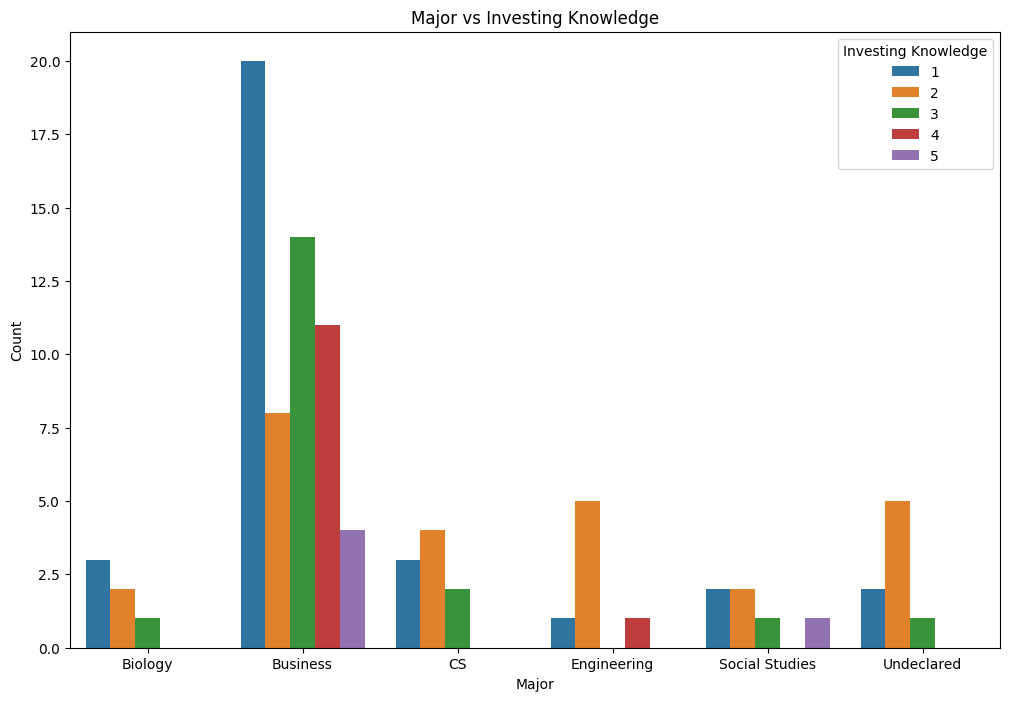

In [13]:
m_i = smc_data.groupby(by=["Major", "Investing Knowledge"]).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
plt.xlabel('Major')
plt.ylabel('Count')
plt.legend(title='Investing Knowledge')
sns.barplot(x='Major', y='Count', hue='Investing Knowledge', data=m_i)
plt.title('Major vs Investing Knowledge')
plt.show()

There is no clear trend in a specific major having more investing experience. Overall, most majors have a downwards trend in frequency of investing knowledge (novice -> expert), where (1-3) novice-intermediate are predominant across all majors. However, business-related majors do have a higher frequency of (4-5) expert to master investing knowledge. Additionally, business has the largest spread/diversity of investors from 1-5, followed by social studies (1,2,3,5), with the remaining majors having a spread of 3.

In this graph, we can see that Biology, Business, and Computer Science (CS) have the highest frequency of 3rd years. Engineering and Undeclared have the highest number of 2nd years. Lastly, Social Studies has a majority of seniors. In terms of the spread of student years for each major, Business has the most at 5 (Year 1-5) and Engineering at 4 (Year 1-4).

**Marketing Impression vs Major**

We want to look into any correlation between major and marketing impression in our competitors. Questions to ask are:

1. What marketing platforms reached the most diverse set of majors?
2. Did certain marketing platforms have greater reach on certain majors?

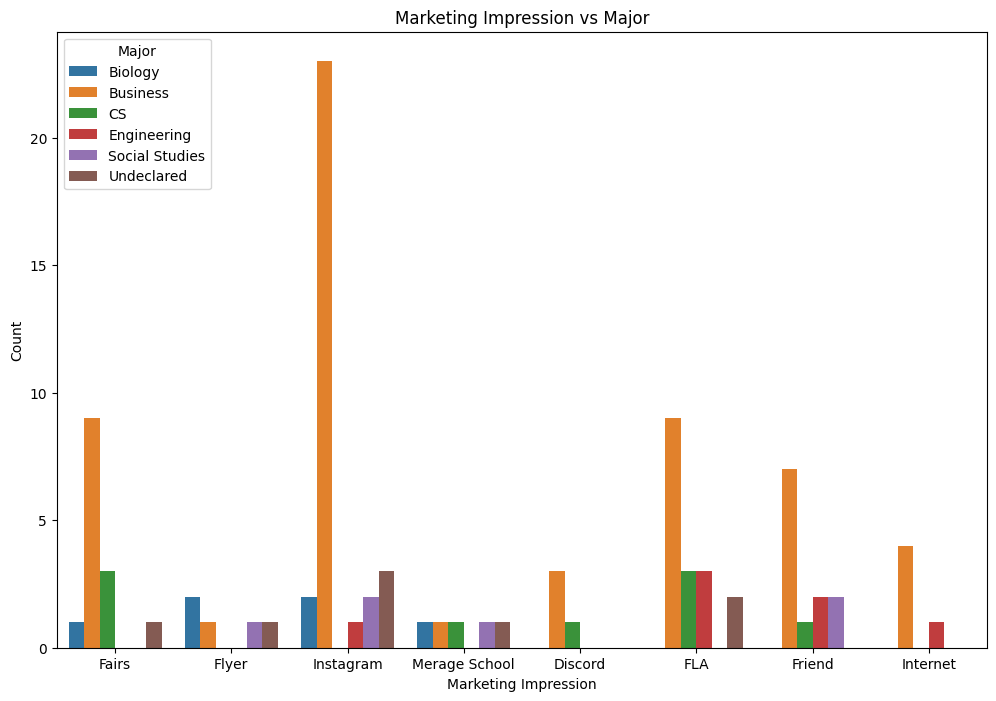

In [14]:
m_m = smc_data.groupby(by=["Major", "Marketing Impression"]).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(x='Marketing Impression', y='Count', hue='Major', data=m_m)
plt.title('Marketing Impression vs Major')
plt.xlabel('Marketing Impression')
plt.ylabel('Count')
plt.legend(title='Major')
plt.show()

Overall, Fairs, Instagram, FLA reached mostly business majors, but had higher counts of non-business majors like Computer Science, Undeclared, and Engineering. In terms of reaching a diverse set of majors, Instagram and Merage School reached widest number, while Internet and Discord reach the least number of majors with a concentration of business majors. Flyers and the Merage School had wide reaches of major, but recruited significantly less number of participants. 

For the goal of recruiting a diverse set of majors, It is recomended to utilize Fairs, FLA, and Instagram to develop a more diverse competitor base. Additionally, it is worthwhile to explore how our organization can utilize the Merage School and Flyers more effectively. Lastly, Discord and the Internet did not have a significant impact on number of competitors and did not recruit a diverse set of majors, so I would not recommend investing more resources in those marketing platforms.

**Investing Knowledge vs Year**

We want to look into any correlation between investing knowledge and year in our competitors. Questions to ask are:

1. Do younger years have less investing knowledge? (if we want to target newer investors do we need to focus on younger classmen)

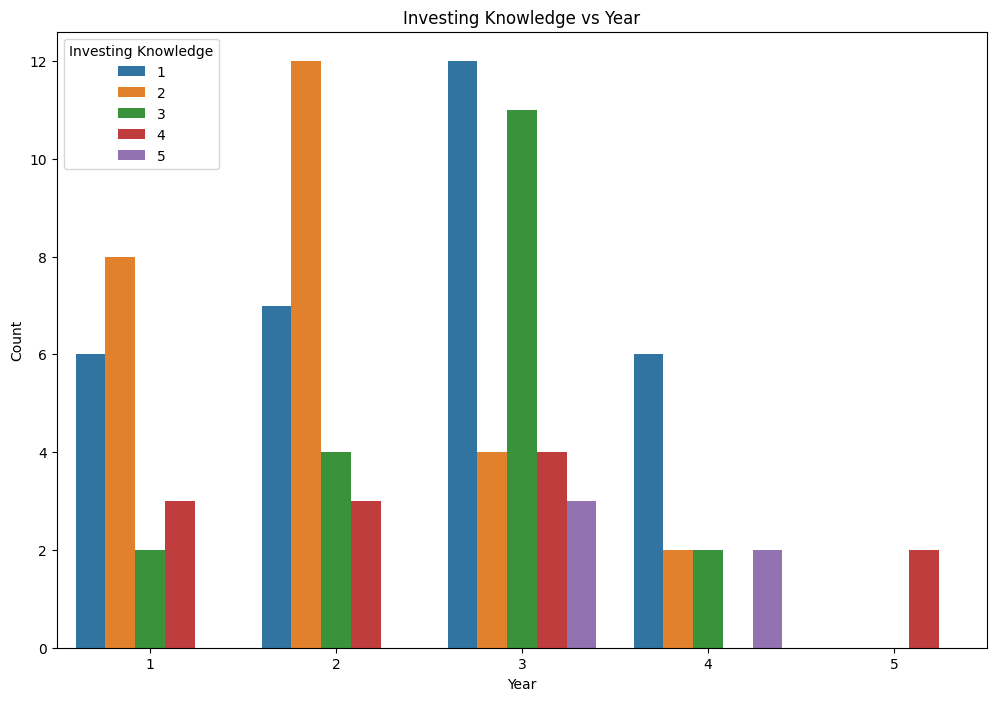

In [15]:
i_y = smc_data.groupby(by=["Year", "Investing Knowledge"]).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Count', hue='Investing Knowledge', data=i_y)
plt.title('Investing Knowledge vs Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Investing Knowledge')
plt.show()

Based on the graph, there is no clear trend in year and investing knowledge with 1st and 2nd years having a mode of 2 (beginner), 3rd and 4th years having a mode of 1 (novice), and 5th years with a mode of 4 (expert).

**Year vs Marketing Impressions**

We want to look into any correlation between marketing impressions and years in our competitors. Questions to ask are:

1. If we want to target more 1st years, what marketing platform do we use?
2. Do certain platforms reach certain years?

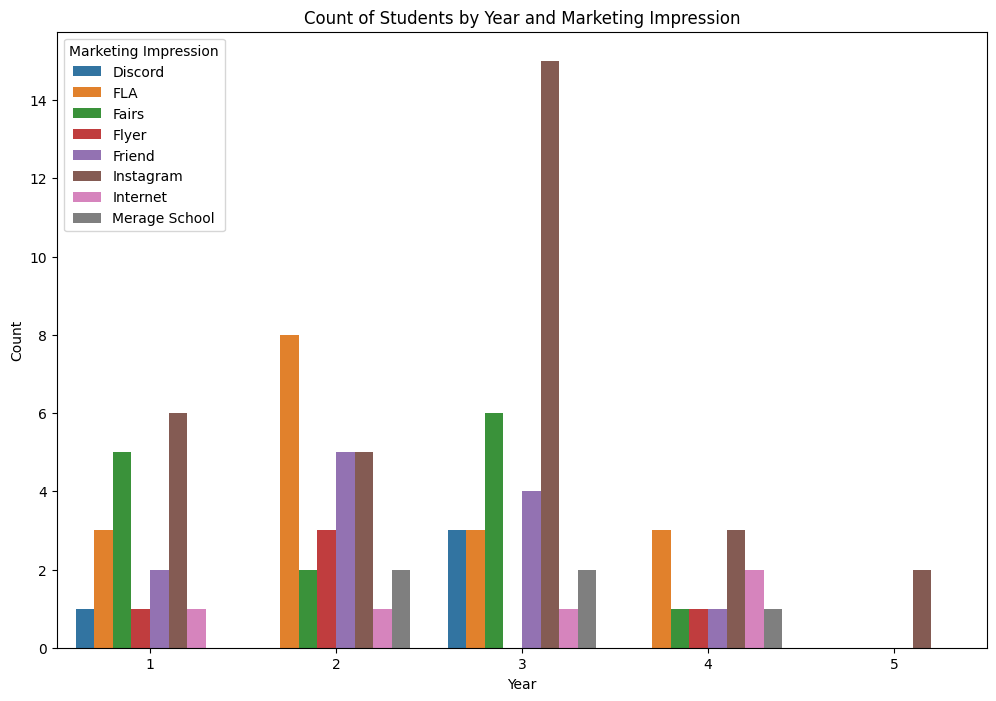

In [16]:
y_m = smc_data.groupby(by=["Year", "Marketing Impression"]).size().reset_index(name='Count')
# Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Count', hue='Marketing Impression', data=y_m)
plt.title('Count of Students by Year and Marketing Impression')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Marketing Impression')
plt.show()

For our first question, if we want to reach more first years, Instagram and Fairs had the largest impact. This trend can also be seen with 3rd years, who can be transfer students. For 2nd and 4th years, member conversions from FLA had the biggest impact. 

**Investing Knowledge vs Marketing Impression**

We want to look into any correlation between investing knowledge and marketing impressions in our competitors. Questions to ask are:

1. Do certain marketing platforms reach certain investing knowledge levels?

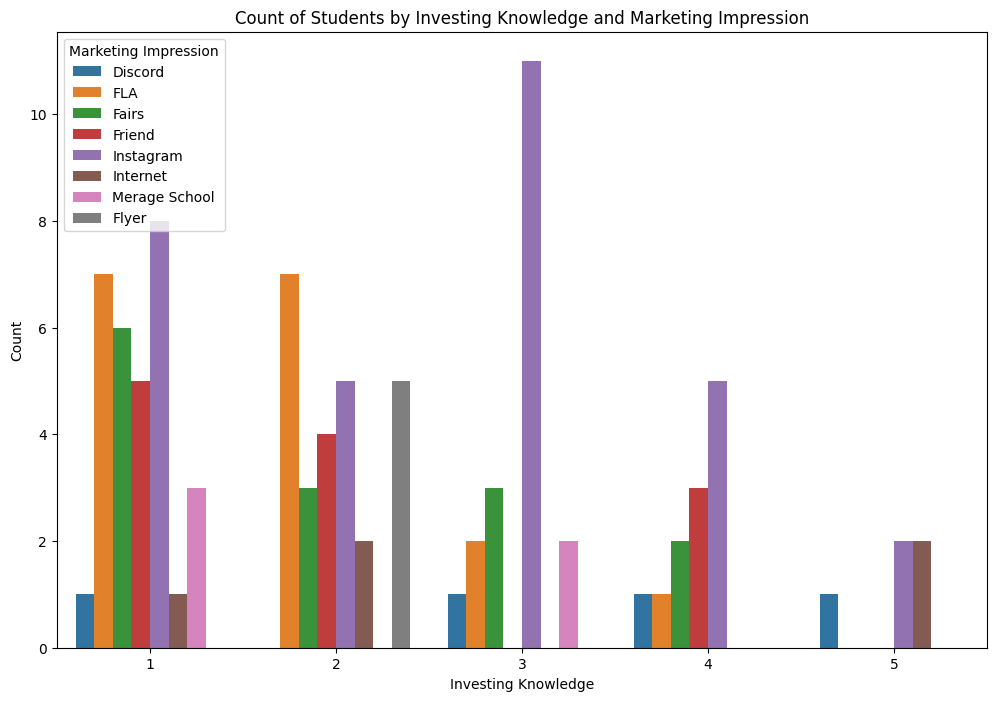

In [17]:
i_m = smc_data.groupby(by=["Investing Knowledge", "Marketing Impression"]).size().reset_index(name='Count')
# Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Investing Knowledge', y='Count', hue='Marketing Impression', data=i_m)
plt.title('Count of Students by Investing Knowledge and Marketing Impression')
plt.xlabel('Investing Knowledge')
plt.ylabel('Count')
plt.legend(title='Marketing Impression')
plt.show()

Overall, Instagram had a large reach across all different types of investing skill levels. Specifically, for novice and beginners, FLA member conversion had a significant impact on SMC competitor recruiting.

# Summary:
1. **Breakdown competitor demographics**

    1. Major: 3/5 of competitors are business-related majors, while remaining 2/5 are Computer Science, Undeclared, Engineering, Biology, and Social Studies 
    1. Year: 2nd and 3rd years make up nearly 2/3 of competitors
    1. Investing Knowledge: Highest category is 1 (novice) decreasing in frequency as investing knowledge increases  
    1. Marketing Impression: Instagram (33.3%), conversion from FLA members (18%), In-Person Boothing at Fairs (15%), Word of Mouth/Friends (13%)   
    1. Signup Month: Majority signups in Sep. and Oct. driven by Instagram, Fairs, and FLA

2. **Measure organization's goals**
    1. Target diverse pool of majors (***NOT REACHED***) - more than half are business majors
    1. Target diverse pool of student years (***REACHED***) - no year takes up more than 50% 
    1. Target students new to investing (***REACHED***) - 60% of investors were at a novice-beginner level
    
3. **Measure success of marketing strategies**
    1. Instagram, Fairs, FLA, Word of Mouth(Friends) had biggest impact
    1. Discord, Flyers, Internet, Merage School of Business had lowest impact

4. **Recommendations (for missed goals)**
    1. For the goal of recruiting a diverse set of majors, It is recomended to continue to utilize Fairs, FLA, and Instagram. Additionally, it is worthwhile to explore how our organization can utilize the Merage School of Business and Flyers more effectively as they reached a greater spread of majors. Lastly, Discord and the Internet did not have a significant impact on number of competitors and major diversity, so I would not recommend investing more resources in those marketing platforms
    1. To maintain the goal of having a diverse pool of student years, Instagram and Fairs had the largest impact in recruiting 1st and 3rd years, while member conversion from FLA had the biggest effect on 2nd and 4th years. 
    1. To maintain the goal of having newer investors, FLA conversion had the biggest effect.